<span style="color:red">**<<<<<<< local**</span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Collect-Data" data-toc-modified-id="Collect-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Collect Data</a></span></li><li><span><a href="#Visualizing-the-Data-with-WordClouds" data-toc-modified-id="Visualizing-the-Data-with-WordClouds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing the Data with WordClouds</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#nltk" data-toc-modified-id="nltk-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>nltk</a></span></li></ul></li><li><span><a href="#Calculate-Polarity-Scores" data-toc-modified-id="Calculate-Polarity-Scores-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate Polarity Scores</a></span><ul class="toc-item"><li><span><a href="#Sentiment:-reliable-vs-unreliable" data-toc-modified-id="Sentiment:-reliable-vs-unreliable-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sentiment: reliable vs unreliable</a></span></li></ul></li><li><span><a href="#Frequency-Distribution" data-toc-modified-id="Frequency-Distribution-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Frequency Distribution</a></span></li></ul></div>

<span style="color:red">**=======**</span>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Topic-Modeling-with-Gensim/LDA" data-toc-modified-id="Topic-Modeling-with-Gensim/LDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Topic Modeling with Gensim/LDA</a></span><ul class="toc-item"><li><span><a href="#Reliable" data-toc-modified-id="Reliable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Reliable</a></span></li><li><span><a href="#Unreliable" data-toc-modified-id="Unreliable-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Unreliable</a></span></li></ul></li><li><span><a href="#Interactive-topic-model-visualization-using-sklearn" data-toc-modified-id="Interactive-topic-model-visualization-using-sklearn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Interactive topic model visualization using sklearn</a></span><ul class="toc-item"><li><span><a href="#Definitions-of-visual-elements-in-LDAvis" data-toc-modified-id="Definitions-of-visual-elements-in-LDAvis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Definitions of visual elements in LDAvis</a></span></li><li><span><a href="#Let-look-what-the-difference-is-between-negative-and-positive-news-content" data-toc-modified-id="Let-look-what-the-difference-is-between-negative-and-positive-news-content-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Let look what the difference is between negative and positive news content</a></span><ul class="toc-item"><li><span><a href="#Convert-to-document-term-matrix" data-toc-modified-id="Convert-to-document-term-matrix-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Convert to document-term matrix</a></span></li><li><span><a href="#Fit-Latent-Dirichlet-Allocation-models" data-toc-modified-id="Fit-Latent-Dirichlet-Allocation-models-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Fit Latent Dirichlet Allocation models</a></span></li><li><span><a href="#Visualizing-the-models-with-pyLDAvis" data-toc-modified-id="Visualizing-the-models-with-pyLDAvis-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Visualizing the models with pyLDAvis</a></span></li><li><span><a href="#Positive-Content" data-toc-modified-id="Positive-Content-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Positive Content</a></span></li></ul></li></ul></li><li><span><a href="#Let's-narrow-it-down-to-two-categories" data-toc-modified-id="Let's-narrow-it-down-to-two-categories-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Let's narrow it down to two categories</a></span><ul class="toc-item"><li><span><a href="#Fake-News-Content" data-toc-modified-id="Fake-News-Content-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fake News Content</a></span></li><li><span><a href="#Reliable-News-Content" data-toc-modified-id="Reliable-News-Content-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Reliable News Content</a></span></li></ul></li><li><span><a href="#Linguistic-Features" data-toc-modified-id="Linguistic-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Linguistic Features</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-entity-recognizer" data-toc-modified-id="Visualizing-the-entity-recognizer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Visualizing the entity recognizer</a></span></li><li><span><a href="#Dependency-parsing---Noun-chunks" data-toc-modified-id="Dependency-parsing---Noun-chunks-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Dependency parsing - Noun chunks</a></span></li></ul></li></ul></div>

<span style="color:red">**>>>>>>> remote**</span>

## Libraries

<span style="color:red">**<<<<<<< local**</span>

In [36]:
from IPython.display import Image
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'

import os
import re
import json
import string

from collections import Counter
from tabulate import tabulate
from html.parser import HTMLParser
from tqdm import tqdm
from pprint import pprint
from pathlib import Path

import pandas as pd
import numpy as np

import nltk
from nltk import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.style import set_palette
set_palette('muted')

from wordcloud import WordCloud, STOPWORDS

import plotly 
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

import cufflinks as cf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
config_file = os.path.join(str(Path.home()), '.auth/plotly.json')
with open(config_file) as f:
    tokens = json.load(f)
    
plotly.tools.set_credentials_file(username=tokens['username'], api_key=tokens['token'])
plotly.offline.init_notebook_mode(connected=True)

<span style="color:red">**=======**</span>

In [1]:
from IPython.display import Image
from IPython.display import IFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'

import os
import re
import string
from collections import Counter
from tabulate import tabulate
from html.parser import HTMLParser

import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from tqdm import tqdm

import pandas as pd
import numpy as np
np.random.seed(42)

import spacy
from spacy import displacy
from spacy.lang import punctuation
from spacy.lang.en import English
from spacy.lang.en import stop_words
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES

from collections import defaultdict

import gensim
from gensim import corpora

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings("ignore")

/anaconda3/envs/learnco_projects/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
<<<<<<< local
print(plotly.__version__)
=======
print(spacy.__version__)
>>>>>>> remote

<span style="color:red">**<<<<<<< local**</span>

## Collect Data

Let us have a closer look at the data we got via webhose.io. We shall read in the text files and put everything into a dataframe with its proper category label.

In [7]:
filenames = [name for name in os.listdir('url_data/')]
print(filenames)

['satire.txt', 'clickbait.txt', 'bias.txt', 'conspiracy.txt', 'reliable.txt', 'combined_unreliable.txt', 'political.txt', 'fake.txt', 'junksci.txt', 'unreliable.txt']


In [5]:
lines = []
catgy = []

with tqdm() as progress:
    for fname in filenames:
        for line in open('url_data/' + fname):
            lines.append(line.rstrip('\n').rstrip("\'").lstrip("b\'"))
            catgy.append(fname.split('.')[0])

        progress.update()

10it [00:00, 28.17it/s]


In [6]:
df = pd.DataFrame({'news_content': lines, 'category': catgy})
df.to_csv('data/combined_news_content.csv', index=False)

In [8]:
df = pd.read_csv('data/combined_news_content.csv')
categories = df.category.value_counts()

labels = categories.index.tolist()
content_values = categories.values.tolist()

In [9]:
trace = go.Pie(labels=labels, values=content_values, hoverinfo='label+percent', textinfo='value', 
               title='Categories by Amount of Content')
py.iplot([trace], filename='categories_by_amount_of_content')

In [10]:
source_df = pd.read_csv('data/url_sources.csv')
categories = source_df.category.value_counts()

labels = categories.index.tolist()
url_values = categories.values.tolist()

In [11]:
trace = go.Pie(labels=labels, values=url_values, hoverinfo='label+percent', textinfo='value', 
               title="Categories by URL's")
py.iplot([trace], filename='categories_by_url')

We have nearly double the number of url's categorized as fake vs reliable, but we were able to scrap far more data from reliable sources compare to any other.

## Visualizing the Data with WordClouds

By looking at a wordcloud picture we can get some rough sense of which words are more weighted by a given category. But not necessarily to the point that we could create meaningful conclusions from it.

In [12]:
filename = 'url_data/bias.txt'

lines = [line.rstrip('\n').rstrip("\'").lstrip("b\'") for line in open(filename)]
lines[0]

'She was merely following her dreams. That is the meaning of life now.'

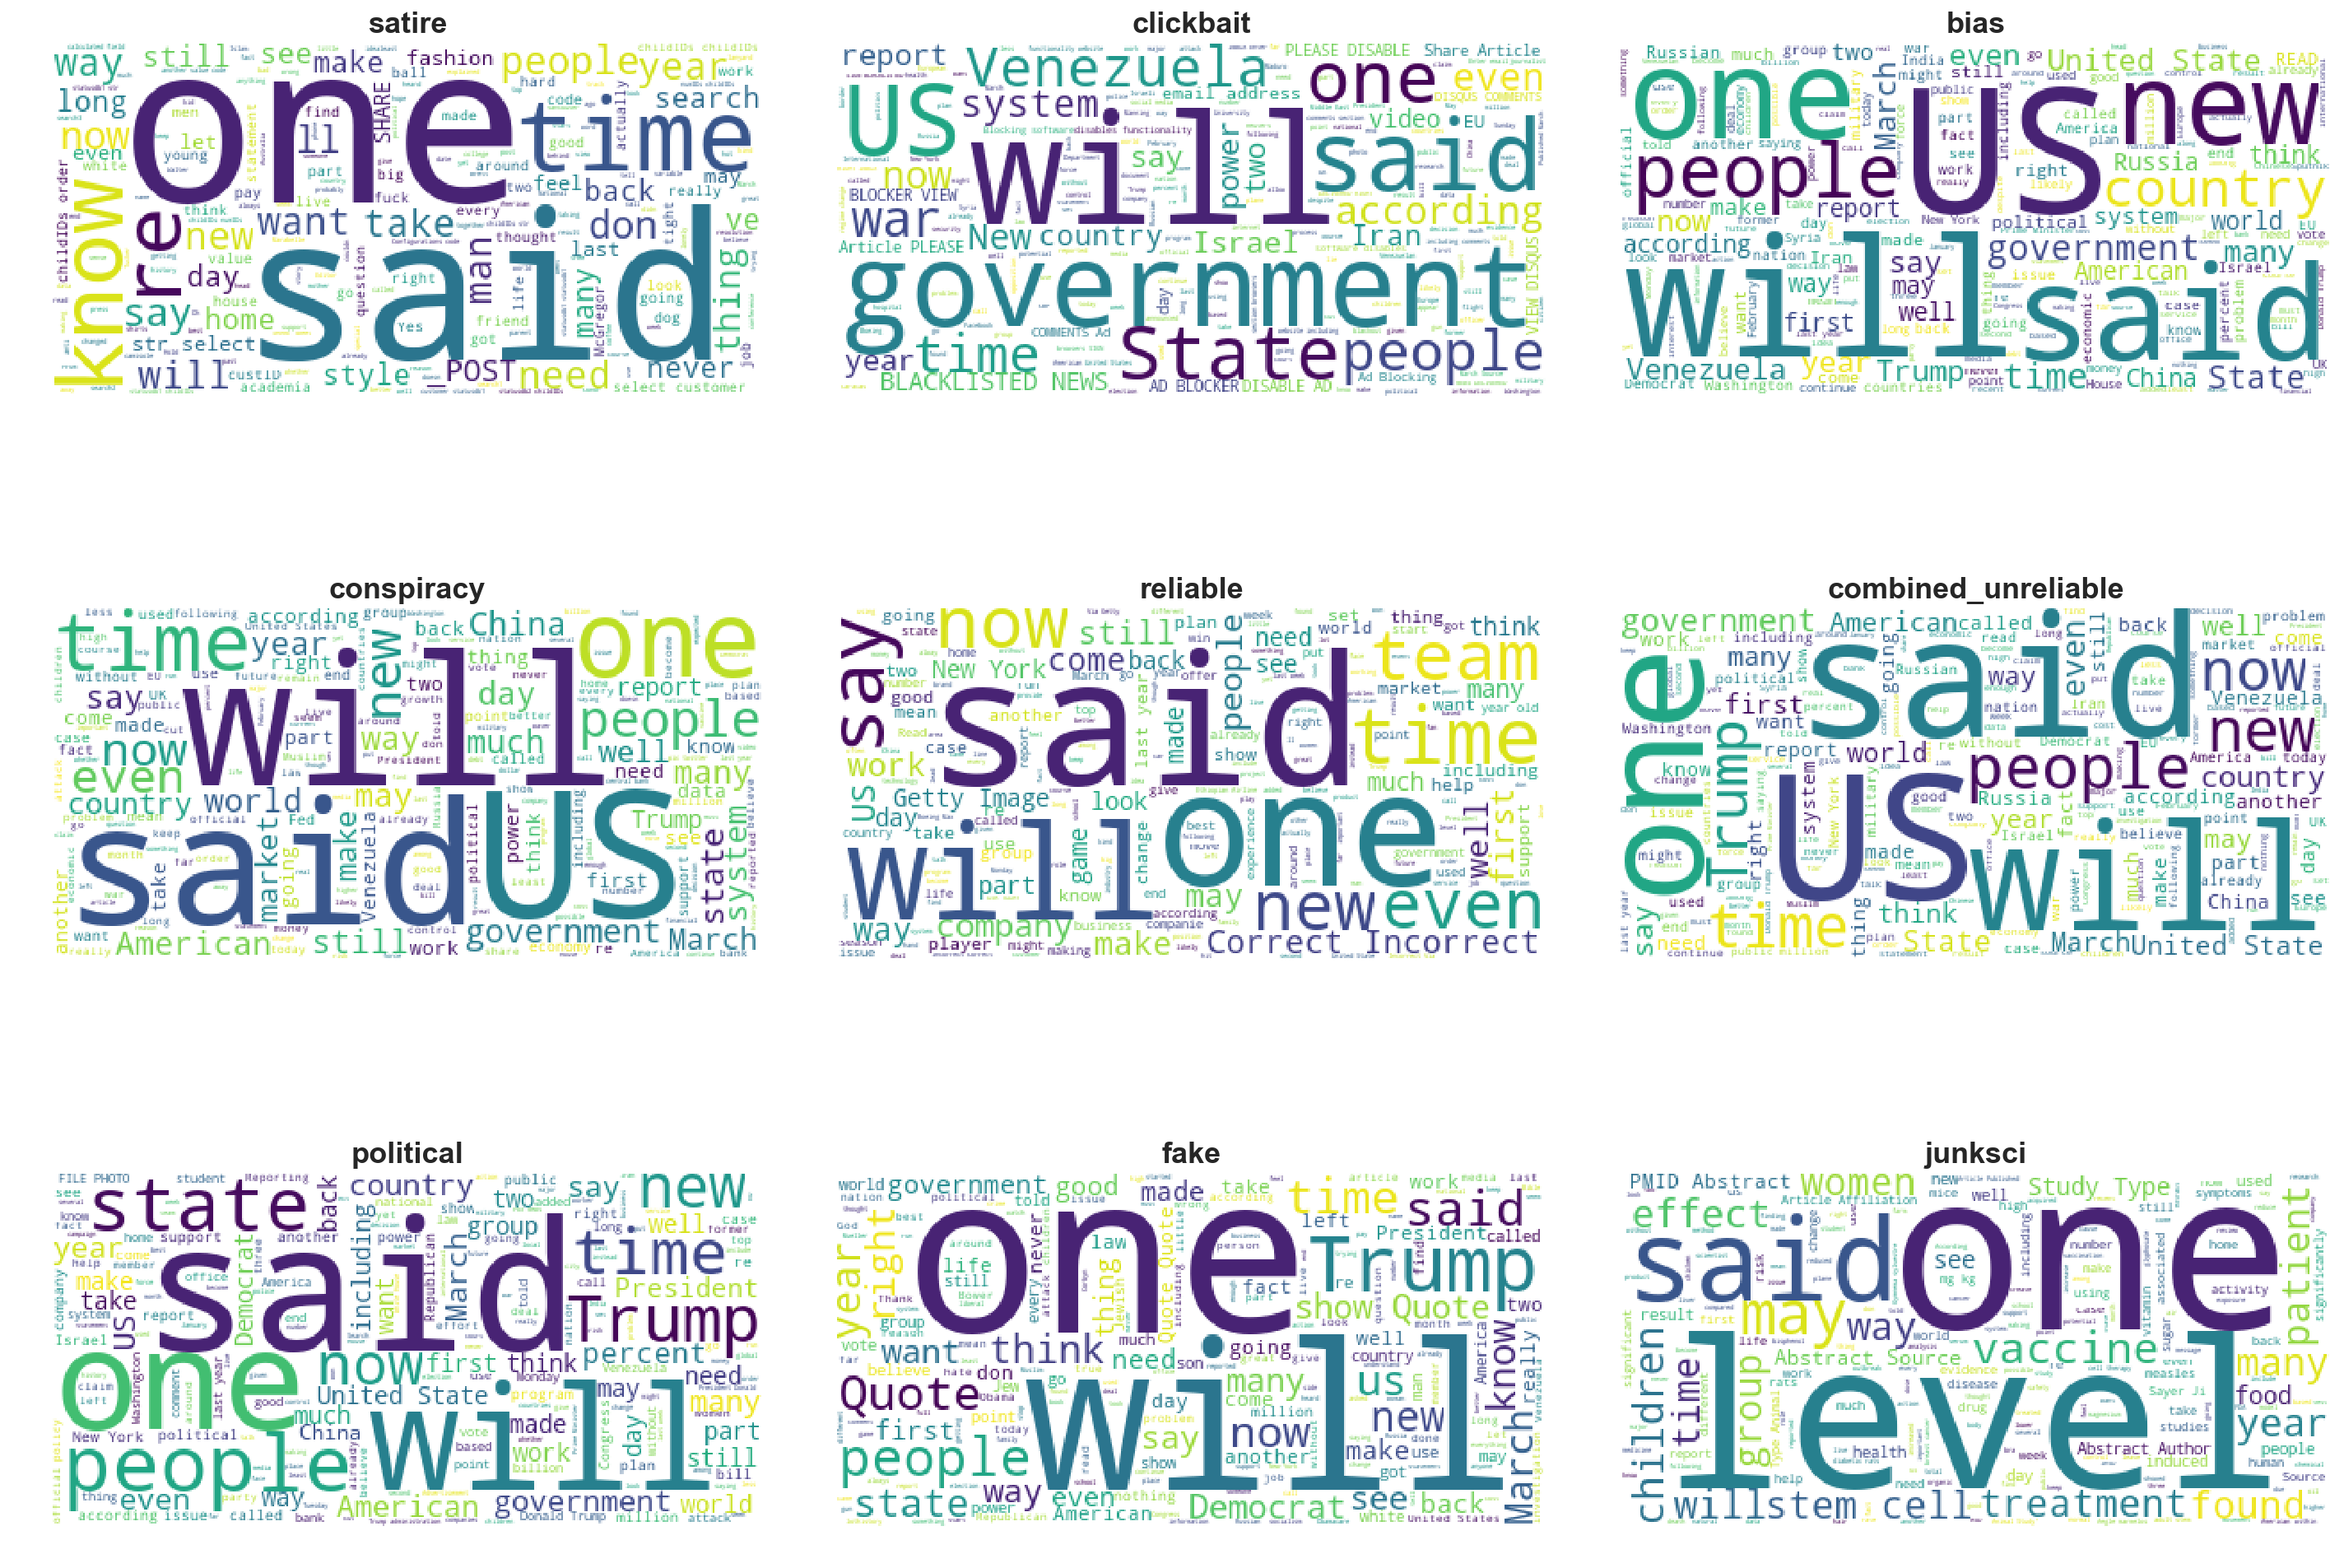

In [13]:
cat_list = df.category.unique().tolist()

ncol = 3
nrow = 3
fig = plt.figure(figsize=(20, 15))
ax = []

for i in range(ncol * nrow):
    news_content = df[df.category==cat_list[i]].news_content.tolist()
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=None, 
        random_state=1 
    ).generate(str(news_content))
    
    ax.append( fig.add_subplot(nrow, ncol, i+1) )
    ax[-1].set_title(cat_list[i], fontsize=18, fontweight='bold')
    plt.axis('off')
    plt.imshow(wordcloud)

plt.tight_layout()
plt.show();

## Sentiment Analysis

### nltk

For our sentiment analysis we will use the vader package from nltk (Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.).

Give a sentiment intensity score to sentences as four values, negative, neutral, positive and compound. Where the compound score value is normalized between -1 and 1 based on the sum of all lexicon ratings in the sentence.

In [14]:
# Instantiate SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

def text_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    print("{}\n\n{}".format(text, str(sentiment)))

In [15]:
text_sentiment_score(df[df['category'] == 'political']['news_content'].iloc[0])

STATEMENT: CAP’s Tom Jawetz Applauds Introduction of H.R. 6, Calls on Congress to Pass Long-Overdue Protections for Dreamers, TPS and DED Beneficiaries Date: March 12, 2019 Contact: Rafael Medina Email: ‮g​r​o​.​s​s​e​r​g​o​r​p​n​a​c​i​r​e​m​a​&commat;​a​n​i​d​e​m​j​r‭ Washington, D.C. — Today, Reps. Lucille Roybal-Allard (D-CA), Nydia M. Velázquez (D-NY), and Yvette D. Clarke (D-NY) introduced H.R. 6, the Dream and Promise Act of 2019—an important bill that provides permanent protections for Dreamers, Temporary Protected Status (TPS) holders, and Deferred Enforced Departure (DED) beneficiaries. Tom Jawetz , vice president of Immigration Policy at the Center for American Progress, issued the following statement: While the Trump administration continues to spew anti-immigrant rhetoric— requesting , yet again, billions of dollars for the president’s vanity project of a border wall just weeks after Congress rejected his last request—House Democrats are making good on their promise to figh

In [16]:
text_sentiment_score(df[df['category'] == 'fake']['news_content'].iloc[0])

18 hours ago Shutterstock Atletico Madrid head to Northern Italy to take on Serie A champions Juventus in the second leg of their epic Champions League matchup. Despite being favored heading into the tie, Juventus find themselves with a substantial hole to climb out of as they conceded two goals to Atletico’s two central defenders at the Wanda Metropolitano Stadium in Madrid back on February 20. If Atletico can find a way to score a single goal at the Allianz, Juventus will need to score four goals against the notoriously stingy Spanish side to advance, as Atleti would hold the away goals advantage. Today’s second leg tie features two of the world’s biggest clubs that are full of some of the world’s best players, so make sure you find out how to live stream the action on your desktop, laptop, or mobile device here. Can’t watch today’s second leg matchup from the comfort of your couch? Find out how to live stream Atletico Madrid take on Juventus in today’s Champions League matchup below

Even so we choose the first text in our dataset the difference between `fake` news and `political` is not particularly great.

## Calculate Polarity Scores

In [17]:
def sentiment_analyze(df):
    """
    Add the sentiment features to the dataframe and 
    define whether or not something is negative or positive
    
    :param df: dataset
    :return: dataset
    """
    
    sentiments = []
    with tqdm() as progress:
        for i in range(df.shape[0]):
            line = df['news_content'].iloc[i]
            sentiment = sia.polarity_scores(line)
            sentiments.append([sentiment['neg'], sentiment['pos'], 
                               sentiment['neu'], sentiment['compound']])
        
            progress.update()
        
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1

    return df 

In [18]:
df_hist = sentiment_analyze(df)

24098it [03:06, 129.41it/s]


In [19]:
df_hist.to_csv('data/sentiment_analyze.csv', index=False)
df_hist.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
0,"MANILA, Philippines ( The Adobo Chronicles, Ma...",satire,0.058,0.099,0.842,0.6808,False,True
1,"What boots a tree we cannot climb, Or cut, and...",satire,0.136,0.111,0.753,-0.8233,True,False
2,"Offers no great, grand accounting for the morr...",satire,0.157,0.213,0.629,0.9715,False,True
3,Home › The Rest › Video News › End of the Blue...,satire,0.095,0.159,0.746,0.8054,False,True
4,"It’s time to get some more hard-hitting, punch...",satire,0.115,0.150,0.735,0.9725,False,True


In [20]:
hist_data = df_hist.drop(['news_content', 'category', 'Negative', 'Positive'], axis=1)
hist_data.iplot(kind='histogram', subplots=True, shape=(4, 1), filename='sentiment_analyze_histogram')

In [21]:
percentiles = hist_data['compound'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

count    24098.000000
mean         0.203178
std          0.763001
min         -1.000000
10%         -0.963790
20%         -0.774180
30%         -0.372100
40%          0.000000
50%          0.440400
60%          0.757120
70%          0.923090
80%          0.980500
90%          0.995500
max          1.000000
Name: compound, dtype: float64

From the distribution above we can see that the content we have gathered is very much devided between negative, positive and neutral.

In [22]:
# Group data together
hdata = [hist_data['neg'], hist_data['pos']]
labels = ['negative', 'positive']

# Create distplot with custom bin_size
fig = ff.create_distplot(hdata, labels, bin_size=.01, )
fig['layout'].update(title='Positive Negative Distribution')

py.iplot(fig, filename='posneg_distplot')

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'title': {'text': 'Positive Negative Distribution'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.35, 1], 'position': 0.0},
    'yaxis2': {'anchor': 'x', 'domain': [0, 0.25], 'dtick': 1, 'showticklabels': False}
})

The draw time for this plot will be slow for clients without much RAM.


If we compare negative and positive content directly we see that they are pretty close together in their distribution.

<span style="color:red">**=======**</span>

**NOTE**:

Due to the nature of the pyLDvis package I wanted to use I splitted the EDA into two parts. Due to reasons I am not sure about, pyLDAvis doesn't play along with plotly. pyLDAvis displays it's information much wider that the rest and changes everything plotly does. And in some case both, pyLDAvis and plotly don't display at all in jupyter notebook.

## Cleaning

To be removed from the text are:
+ html text
+ digits
+ stop words
+ newlines characters (i.e. `\n`)
+ punctuations

And we will lemmatize the words where possible.

In [3]:
cachedStopWords  = list(stop_words.STOP_WORDS)
cachedStopWords += list(punctuation.TOKENIZER_SUFFIXES)
cachedStopWords += list(punctuation.TOKENIZER_PREFIXES)
cachedStopWords += list(string.digits)
cachedStopWords += list('–')

lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)

# Strip HTML from strings in Python
# https://stackoverflow.com/a/925630/5983691
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
        
    def handle_data(self, d):
        self.fed.append(d)
        
    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = MLStripper()
    s.feed(text)
    return s.get_data()

def stopwords_lemmatizing(text):
    return [''.join(lemmatizer(word, u"NOUN")) for word in text.split() if word not in cachedStopWords]

def remove_digits(text):
    result =  ''.join(i for i in text if not i.isdigit()).lower()
    return ' '.join(result.split())

def remove_newlines(text):
    return text.replace('\\n', '').replace('\\r', '').replace('\n', '').replace('\r', '').replace('\\', '')

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [4]:
def clean_text(filename):
    text = [line.rstrip('\n').rstrip("\'").lstrip("b\'") for line in open(filename)]
    cleaned = [stopwords_lemmatizing(remove_digits(remove_newlines(remove_punctuation(remove_html(line)))))
               for line in text]
    
    return text, cleaned

In [5]:
reliable_texts, reliable_cleaned_texts = clean_text('url_data/reliable.txt')

In [6]:
type(reliable_cleaned_texts[0])

list

In [7]:
print(reliable_cleaned_texts[0])

['cp', 'current', 'page', 'entertainment', 'saturday', 'march', 'christian', 'movie', 'coming', 'theater', 'nationwide', 'spring', 'christian', 'movie', 'coming', 'theater', 'nationwide', 'spring', 'jeannie', 'law', 'christian', 'post', 'reporter', 'saturday', 'march', 'comment', 'christian', 'movie', 'coming', 'spring', 'succes', 'faithbased', 'film', 'recent', 'year', 'led', 'resurgence', 'christian', 'movie', 'hollywood', 'filmmaker', 'expected', 'echo', 'blockbuster', 'year', 'christian', 'film', 'tim', 'tebowbacked', 'production', 'run', 'race', 'brought', 'million', 'domestically', 'box', 'office', 'year', 'film', 'imagine', 'brought', 'million', 'domestically', 'opening', 'weekend', 'million', 'total', 'superseding', 'expectation', 'movie', 'paul', 'apostle', 'christ', 'film', 'box', 'office', 'opening', 'weekend', 'here', 'list', 'faithbased', 'movie', 'coming', 'spring']


In [8]:
read_files = ['url_data/unreliable.txt', 'url_data/fake.txt', 'url_data/bias.txt', 'url_data/conspiracy.txt']
outfile_name = 'url_data/combined_unreliable.txt'

with open(outfile_name, "w") as outfile:
    for f in read_files:
        with open(f, "r") as infile:
            outfile.write(infile.read())

550175

686662

3878917

2831698

In [9]:
unreliable_texts, unreliable_cleaned_texts = clean_text("url_data/combined_unreliable.txt")

## Topic Modeling with Gensim/LDA

### Reliable

In [10]:
# The text given needs to be a list of lists where the words are seperated, ie. [['test', 'more'], ['stuff']]
dictionary = corpora.Dictionary(reliable_cleaned_texts)
# dictionary.save('data/reliable_text.dict') 

corpus = [dictionary.doc2bow(text) for text in reliable_cleaned_texts]
# corpora.MmCorpus.serialize('data/reliable_text_corpus.mm', corpus)

lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print('topic #{}: {}'.format(topic[0], topic[1]))

topic #0: 0.015*"percent" + 0.011*"market" + 0.008*"year" + 0.008*"price" + 0.008*"said"
topic #1: 0.016*"said" + 0.010*"new" + 0.007*"year" + 0.006*"school" + 0.006*"family"
topic #2: 0.018*"boeing" + 0.017*"airline" + 0.017*"max" + 0.015*"said" + 0.014*"crash"
topic #3: 0.009*"health" + 0.005*"said" + 0.005*"study" + 0.005*"food" + 0.005*"people"
topic #4: 0.019*"game" + 0.011*"team" + 0.010*"season" + 0.008*"point" + 0.007*"player"
topic #5: 0.014*"said" + 0.013*"trump" + 0.010*"president" + 0.007*"new" + 0.006*"state"
topic #6: 0.018*"company" + 0.007*"year" + 0.007*"new" + 0.007*"busines" + 0.006*"million"
topic #7: 0.016*"share" + 0.010*"correct" + 0.009*"incorrect" + 0.007*"phone" + 0.007*"app"
topic #8: 0.013*"million" + 0.012*"year" + 0.010*"season" + 0.009*"team" + 0.008*"deal"
topic #9: 0.012*"like" + 0.007*"time" + 0.006*"people" + 0.006*"thing" + 0.006*"know"


### Unreliable

In [11]:
# The text given needs to be a list of lists where the words are seperated, ie. [['test', 'more'], ['stuff']]
dictionary = corpora.Dictionary(unreliable_cleaned_texts)
# dictionary.save('data/reliable_text.dict') 

corpus = [dictionary.doc2bow(text) for text in unreliable_cleaned_texts]
# corpora.MmCorpus.serialize('data/reliable_text_corpus.mm', corpus)

lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print('topic #{}: {}'.format(topic[0], topic[1]))

topic #0: 0.008*"year" + 0.006*"new" + 0.006*"fed" + 0.006*"money" + 0.005*"budget"
topic #1: 0.009*"state" + 0.009*"country" + 0.009*"said" + 0.008*"president" + 0.007*"trump"
topic #2: 0.006*"people" + 0.005*"like" + 0.005*"time" + 0.005*"year" + 0.004*"new"
topic #3: 0.010*"oil" + 0.008*"bank" + 0.007*"year" + 0.007*"china" + 0.005*"rate"
topic #4: 0.009*"market" + 0.006*"support" + 0.005*"year" + 0.005*"time" + 0.004*"new"
topic #5: 0.012*"eu" + 0.011*"uk" + 0.010*"brexit" + 0.010*"deal" + 0.009*"european"
topic #6: 0.006*"police" + 0.005*"march" + 0.005*"video" + 0.005*"game" + 0.004*"fan"
topic #7: 0.007*"people" + 0.006*"trump" + 0.005*"said" + 0.005*"think" + 0.005*"like"
topic #8: 0.013*"new" + 0.011*"state" + 0.007*"democrat" + 0.007*"law" + 0.006*"york"
topic #9: 0.013*"boeing" + 0.012*"max" + 0.010*"said" + 0.009*"airline" + 0.008*"crash"


As we saw in our sentiment analysis, the same words appear also when we create the topic models, `said`, `new` and `year`. We might be able to see a theme in both. To help us better with that task we will us the pyLDAvis package which is a port from the famous R version by Carson Sievert (https://github.com/cpsievert/LDAvis).

## Interactive topic model visualization using sklearn

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

### Definitions of visual elements in LDAvis

Here we define the dimensions of the visual elements in LDAvis.  There are essentially four sets of visual elements that can be displayed, depending on the state of the visualization.They are:

1. **Default Topic Circles**: $K$ circles, one to represent each topic, whose areas are set to be proportional to the proportions of the topics across the $N$ total tokens in the corpus. The default topic circles are displayed when no term is highlighted.
2. **Red Bars**: $K×W$ red horizontal bars, each of which represents the estimated number of times a given term was generated by a given topic.  When a topic is selected, we show the red bars for the $R$ most relevant terms for the selected topic, where $R= 30$ by default (see Sievert and Shirley (2014) for the definition of relevance).
3. **Blue Bars**: $W$ blue horizontal bars,  one to represent the overall frequency of each term in the corpus. When no topic is selected, we display the blue bars for the $R$ most salient terms in the corpus, and when a topic is selected, we display the blue bars for the $R$ most relevant terms.  See Chuang et al.  (2012) for the definition of the saliency of a term in a topic model.
4. **Topic-Term Circles**: $K×W$ circles whose areas are set to be proportional to the frequencies with which a given term is estimated to have been generated by the topics. When a given term, $w$, is highlighted, the $K$ default circles transition (i.e. their areas change) to the $K$ topic-term circles for term $w$.

### Let look what the difference is between negative and positive news content

<span style="color:red">**>>>>>>> remote**</span>

In [ ]:
<<<<<<< local
=======
df = pd.read_csv('data/sentiment_analyze.csv')

>>>>>>> remote
# get the top 30% from the reliable news (positive)
pos_df = df.loc[df['compound'] >= 0.7]
pos_news = pos_df['news_content'].to_list()

# get the bottom 30% from the reliable news (negative)
neg_df = df.loc[df['compound'] <= 0.3]
neg_news = neg_df['news_content'].to_list()

<span style="color:red">**<<<<<<< local**</span>

In [24]:
# Get the content length
pos_df['length'] = pos_df['news_content'].apply(len)
neg_df['length'] = neg_df['news_content'].apply(len)

In [25]:
# Group data together
hdata = [pos_df['length'], neg_df['length']]
labels = ['positive', 'negative']

# Create distplot with custom bin_size
fig = ff.create_distplot(hdata, labels, bin_size=.1)
fig['layout'].update(title='Positive Negative by Text Length')

py.iplot(fig, filename='NegPos_by_TextLength')

Layout({
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'title': {'text': 'Positive Negative by Text Length'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.35, 1], 'position': 0.0},
    'yaxis2': {'anchor': 'x', 'domain': [0, 0.25], 'dtick': 1, 'showticklabels': False}
})

Comparing positive and negative content by their length (number of written words), we see that negative content has overwhelmingly less written words compared to positive content.

In [26]:
neg = abs(percentiles['30%'])
neu = abs(percentiles['70%'] - percentiles['30%'])
pos = abs(percentiles['max'] - percentiles['70%'])

labels = ['Negative Content', 'Neutral Content', 'Positive Content']
values = [neg, neu, pos]

In [27]:
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', textinfo='value', 
               title='Positive-Neutral-Negative Content Distribution')
py.iplot([trace], filename='ContentDistChart')

Nearly 75% of the content is considered neutral. But with over 20% negative content vs just 4.45% positive content, we have a huge discrepancy in the content. Discrepancy is probably not the correct word to use here. It seems to reflect the feeling that the news are tent to be more negative. 

### Sentiment: reliable vs unreliable

Let us compare reliable and unreliable content directly.

In [28]:
reliable_df   = df_hist[df_hist['category'] == 'reliable']
unreliable_df = df_hist[(df_hist.category != 'reliable') & (df_hist.category != 'political') &
                        (df_hist.category != 'junksci') & (df_hist.category != 'clickbait') &
                        (df_hist.category != 'satire')]

In [29]:
print('Number of reliable articles: {}'.format(reliable_df.shape[0]))
print('Number of unreliable articles: {}'.format(unreliable_df.shape[0]))

Number of reliable articles: 14856
Number of unreliable articles: 7084


To make sure that we have a "balanced" view of the data we will create same size datasets.

In [30]:
# Randomly sample elements from your dataframe
reliable_df = reliable_df.sample(n=7000)
unreliable_df = unreliable_df.sample(n=7000)

In [31]:
v = reliable_df['compound'].values
v = np.around(v, decimals=2)
v = sorted(v.tolist())

c = Counter(v)
ry = np.array([(float(i)/sum(c.values()))*100 for i in c.values()])
rx = np.array(list(c.keys()))

In [32]:
v = unreliable_df['compound'].values
v = np.around(v, decimals=2)
v = sorted(v.tolist())

c = Counter(v)
uy = np.array([(float(i)/sum(c.values()))*100 for i in c.values()])
ux = np.array(list(c.keys()))

In [33]:
trace0 = go.Scatter(
    x = rx,
    y = ry,
    name = 'reliable'
)
trace1 = go.Scatter(
    x = ux,
    y = uy,
    name = 'unreliable'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Sentiment: reliabel vs unreliable',
              xaxis = dict(title = 'Compound'),
              yaxis = dict(title = 'Percent Articles'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='CompoundSentiment')

As we saw before, we have extremes. It's either or kind of thing. But one observation we can make is that we have more reliable content on the positive side. 

In [34]:
trace1 = go.Bar(
    x=['negative', 'neutral', 'positive', 'compound'],
    y=[reliable_df['neg'].mean(), 
       reliable_df['neu'].mean(),
       reliable_df['pos'].mean(),
       reliable_df['compound'].mean()],
    name='reliable'
)
trace2 = go.Bar(
    x=['negative', 'neutral', 'positive', 'compound'],
    y=[unreliable_df['neg'].mean(), 
       unreliable_df['neu'].mean(),
       unreliable_df['pos'].mean(),
       unreliable_df['compound'].mean()],
    name='unreliable'
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Mean Sentiment: reliabel vs unreliable',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='MeanSentiment')

Compounded we see far more reliable content than unreliable.

## Frequency Distribution

What are the 20 most used words after we deleted all stop words in either content?

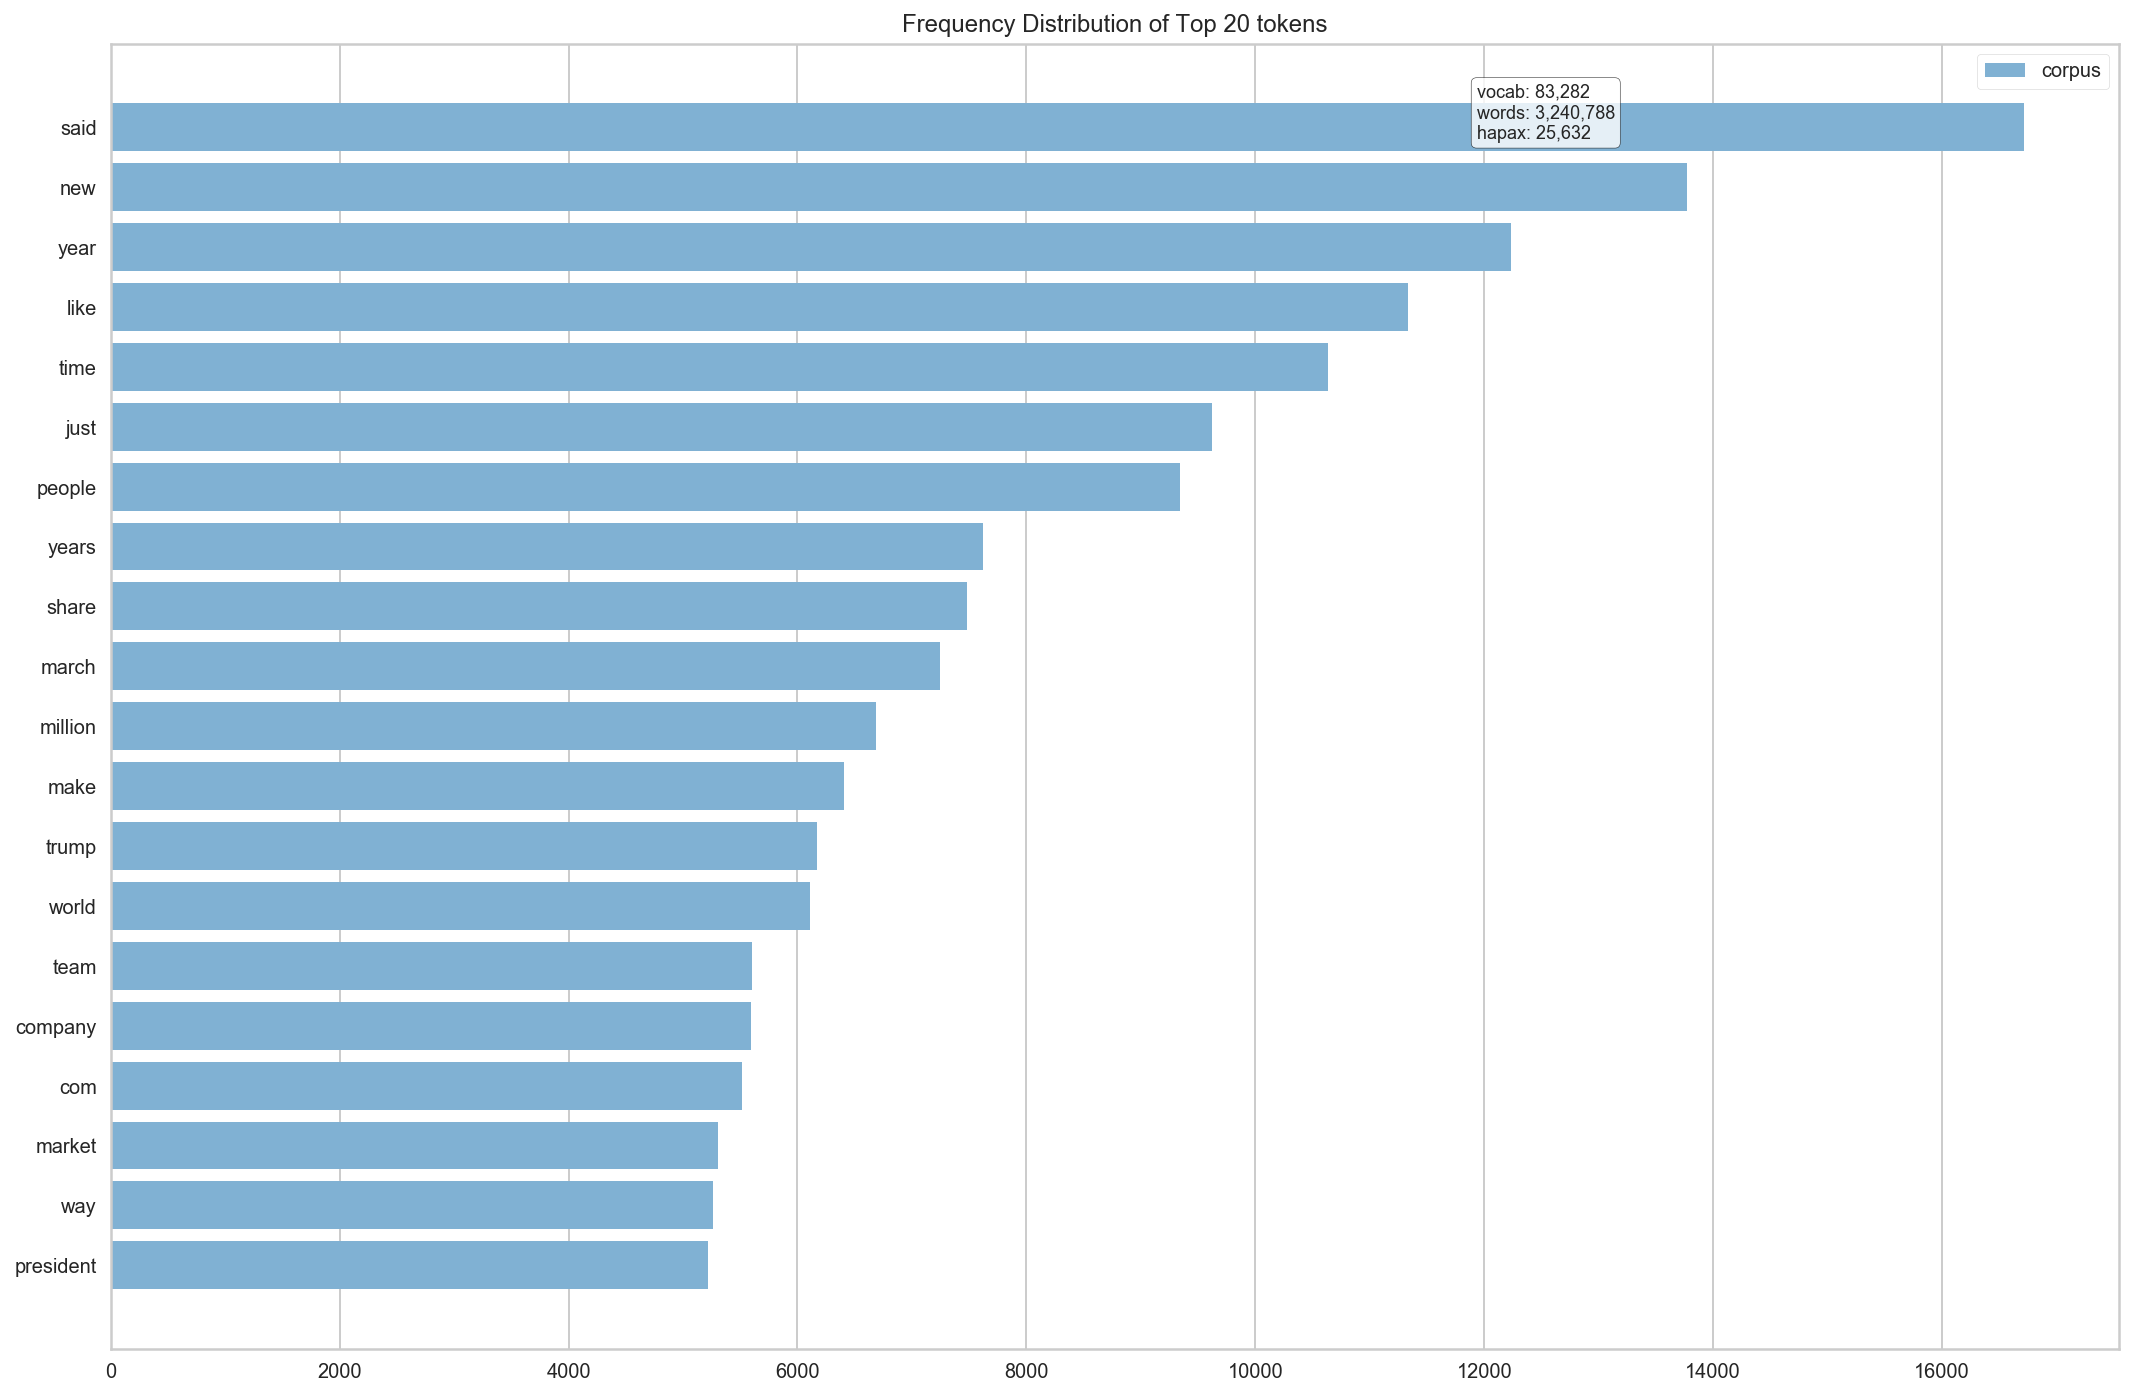

In [37]:
# Instantiate CountVectorizer object and fit positive news and get their features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
docs = tf_vectorizer.fit_transform(pos_news)
features = tf_vectorizer.get_feature_names()

plt.figure(figsize=(18, 12))
# plt.title('20 most frequent words used in POSITIVE news\n', fontweight='bold')

# Instantiate and fit FreqDistVisualizer, plot the top 20 most frequent words
visualizer = FreqDistVisualizer(features=features, n=20, color='blue')
visualizer.fit(docs)
visualizer.poof();

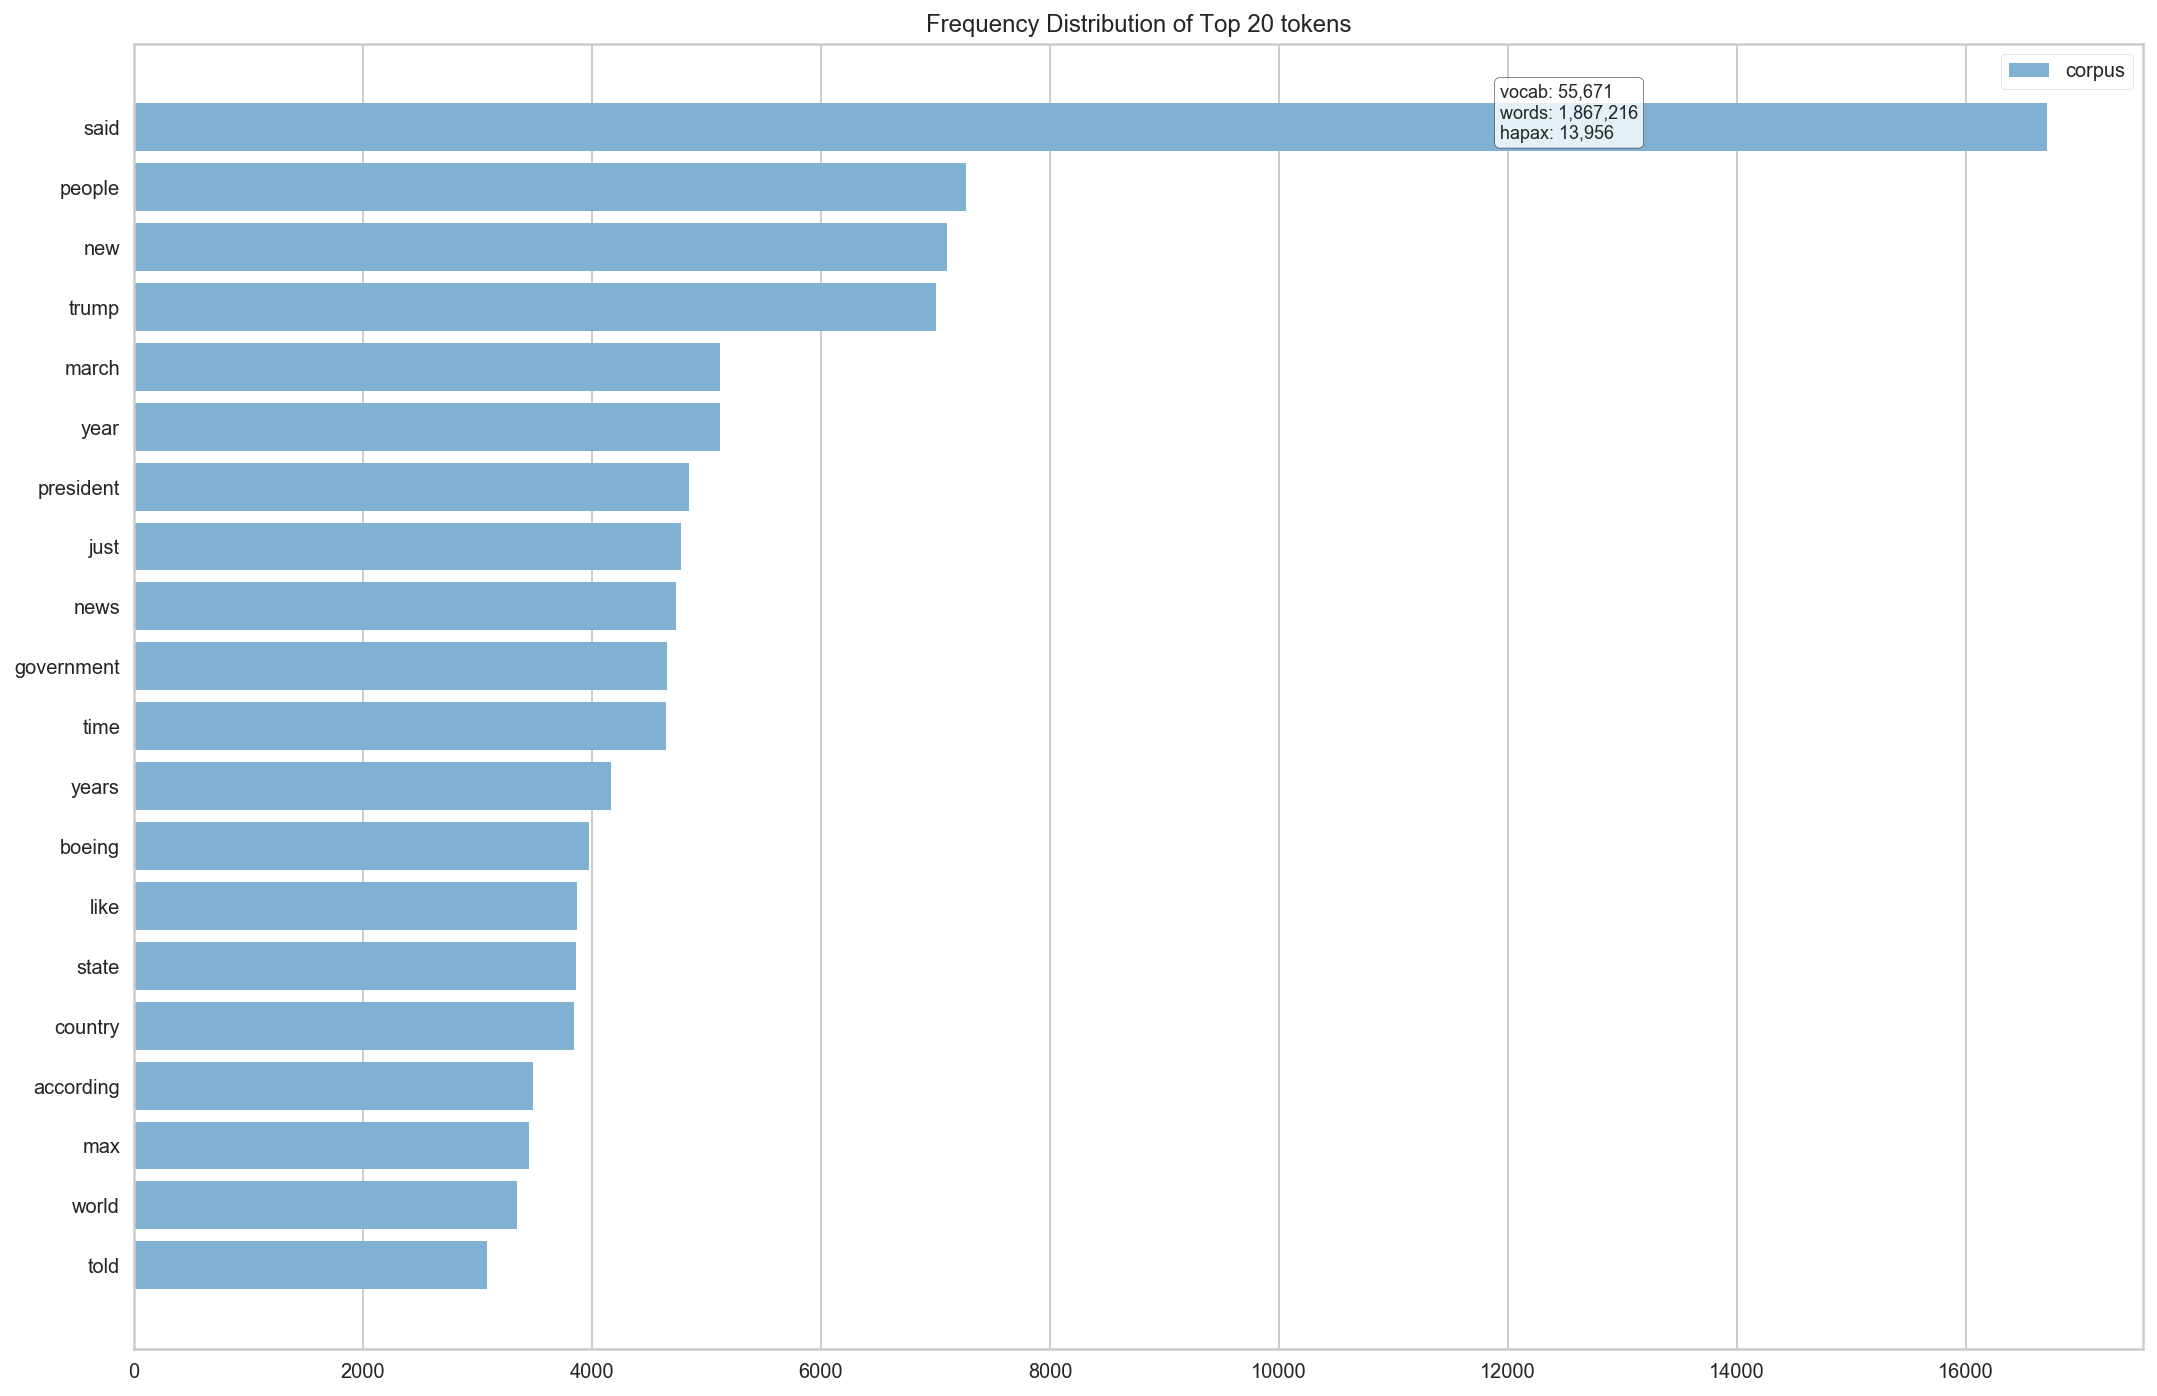

In [39]:
# Instantiate CountVectorizer object and fit negative news and get their features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
docs = tf_vectorizer.fit_transform(neg_news)
features = tf_vectorizer.get_feature_names()

plt.figure(figsize=(18, 12))
# plt.title('20 most frequent words used in NEGATIVE news\n', fontweight='bold')

# Instantiate and fit FreqDistVisualizer, plot the top 20 most frequent words
visualizer = FreqDistVisualizer(features=features, n=20, color="red")
visualizer.fit(docs)
visualizer.poof();

Hmmm, so `said` is **the** word!? But other than that, there are a few similar top ranking words like `people`, `new` and `year`.

<span style="color:red">**=======**</span>

#### Convert to document-term matrix
Next, the raw documents are converted into document-term matrix, possibly as raw counts or in TF-IDF form.

In [13]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(neg_news)
print(dtm_tf.shape)

(11141, 13673)


In [14]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(neg_news)
print(dtm_tfidf.shape)

(11141, 13673)


#### Fit Latent Dirichlet Allocation models
Finally, the LDA models are fitted.

In [15]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

#### Visualizing the models with pyLDAvis

In [17]:
vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.display(vis_data)

#### Positive Content

In [18]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(pos_news)
print(dtm_tf.shape)

(10166, 18623)


In [19]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(pos_news)
print(dtm_tfidf.shape)

(10166, 18623)


In [20]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [21]:
vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.display(vis_data)

## Let's narrow it down to two categories

### Fake News Content

In [22]:
news_content = df[df.category=='fake'].news_content.tolist()

In [23]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(news_content)
print(dtm_tf.shape)

(697, 839)


In [24]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(news_content)
print(dtm_tfidf.shape)

(697, 839)


In [25]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [26]:
vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.display(vis_data)

### Reliable News Content

In [27]:
news_content = df[df.category=='reliable'].news_content.tolist()

In [28]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(news_content)
print(dtm_tf.shape)

(14856, 19493)


In [29]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(news_content)
print(dtm_tfidf.shape)

(14856, 19493)


In [30]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [31]:
vis_data = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.display(vis_data)

Interestingly the topics for reliable content is very concentrated in one line in pretty much one quatrent compare to the fake content or as we previously saw between positive and negative content.

## Linguistic Features

We can (could) furthermore look into some linguistic feature between unreliable and reliable content. To do a deep dive into that area would take some time and probably helpful to study more about it before we do so. But just to get a taste of it let us quickly look at the entity recognizer and dependency parsing.

### Visualizing the entity recognizer
The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [32]:
nlp = spacy.load('en_core_web_sm')

In [33]:
temp_df = df[(df['category'] =='reliable') & (df['Positive'] == True)]
temp_df.sort_values(by='pos', ascending=False, inplace=True)
temp_df.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
12612,"Like, cause, like if you like to like stuff an...",reliable,0.000,0.712,0.288,0.9671,False,True
6963,GOOD LUCK www­­­.­­­inkprofit­­­.comⓇ <­­:) <3...,reliable,0.000,0.703,0.297,0.9651,False,True
3075,God bless this beautiful little girl! Hair or ...,reliable,0.102,0.618,0.279,0.9018,False,True
16525,Jocelyn Beyea I agree. It would help everyone ...,reliable,0.000,0.608,0.392,0.8519,False,True
5275,downgrades Class M-3 from Securitized Asset B...,reliable,0.000,0.571,0.429,0.8074,False,True


In [34]:
text = ''.join(temp_df.iloc[0:10, 0].tolist())

In [35]:
pos_doc = nlp(temp_df['news_content'].iloc[0])
pos_doc.user_data['title'] = 'Top positive news conten'
displacy.render(pos_doc, style='ent', jupyter=True)

In [36]:
temp_df = df[(df['category'] =='reliable') & (df['Negative'] == True)]
temp_df.sort_values(by='neg', ascending=False, inplace=True)
temp_df.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
16888,Ryan Geibl Stop perpetrating democrat LIES and...,reliable,0.652,0.000,0.348,-0.8816,True,False
16580,Insecure white wankers hiding behind a banner ...,reliable,0.595,0.000,0.405,-0.8316,True,False
6236,Murderer and rapist received longest minimum s...,reliable,0.565,0.068,0.366,-0.8885,True,False
12487,Figures! Another insane comment from a lunatic...,reliable,0.565,0.000,0.435,-0.7568,True,False
3104,Always a tragedy when a jet goes down. Lose a ...,reliable,0.558,0.000,0.442,-0.8779,True,False


In [37]:
neg_doc = nlp(temp_df['news_content'].iloc[0])
pos_doc.user_data['title'] = 'Top negative news content'
displacy.render(neg_doc, style='ent', jupyter=True)

### Dependency parsing - Noun chunks

+ **Text**: The original noun chunk text.
+ **Root text**: The original text of the word connecting the noun chunk to the rest of the parse.
+ **Root dep**: Dependency relation connecting the root to its head.
+ **Root head text**: The text of the root token's head.

In [38]:
headers = ['TEXT','ROOT.TEXT','ROOT.DEP_','ROOT.HEAD.TEXT']

chunk_list = []
for chunk in pos_doc.noun_chunks:
    chunk_list.append([chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text])
    
print(tabulate(chunk_list, headers=headers))

TEXT    ROOT.TEXT    ROOT.DEP_    ROOT.HEAD.TEXT
------  -----------  -----------  ----------------
you     you          nsubj        like
stuff   stuff        dobj         like
stuff   stuff        conj         stuff


In [39]:
chunk_list = []
for chunk in neg_doc.noun_chunks:
    chunk_list.append([chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text])
    
print(tabulate(chunk_list, headers=headers))

TEXT                        ROOT.TEXT    ROOT.DEP_    ROOT.HEAD.TEXT
--------------------------  -----------  -----------  ----------------
Ryan Geibl                  Geibl        nsubj        Stop
perpetrating democrat LIES  LIES         dobj         Stop
anti semitism moron         moron        conj         Stop


<span style="color:red">**>>>>>>> remote**</span>